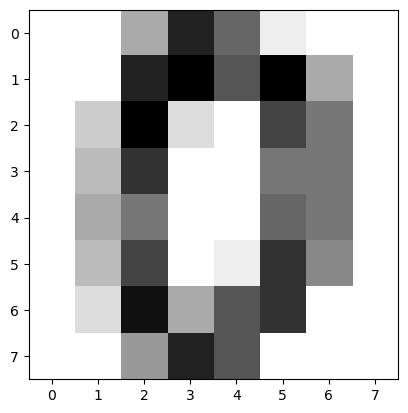

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [12]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X = data
y = digits.target

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [6]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437,)
X test : (360, 64)
y test : (360,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(50,input_shape=(64,),activation='sigmoid'))
model.add(Dense(40,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                3250      
                                                                 
 dense_9 (Dense)             (None, 40)                2040      
                                                                 
 dense_10 (Dense)            (None, 30)                1230      
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
Total params: 6,830
Trainable params: 6,830
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
45/45 [==============================] - 0s 3ms/step - loss: 2.0393 - accuracy: 0.2443 - val_loss: 1.4855 - val_accuracy: 0.4556
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 1.2941 - accuracy: 0.5247 - val_loss: 1.0567 - val_accuracy: 0.6139
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 0.9246 - accuracy: 0.6820 - val_loss: 0.7497 - val_accuracy: 0.7417
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.7557 - val_loss: 0.7169 - val_accuracy: 0.6972
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.7093 - accuracy: 0.7432 - val_loss: 0.7653 - val_accuracy: 0.7111
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.7676 - accuracy: 0.7223 - val_loss: 0.7195 - val_accuracy: 0.7389
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.7717 - val_loss: 0.5811 - val_accuracy: 0.7972
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.9200 - val_loss: 0.3417 - val_accuracy: 0.9278
Epoch 60/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2026 - accuracy: 0.9471 - val_loss: 0.3931 - val_accuracy: 0.9056
Epoch 61/100
45/45 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 0.9443 - val_loss: 0.4430 - val_accuracy: 0.8833
Epoch 62/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8914 - val_loss: 0.5486 - val_accuracy: 0.8444
Epoch 63/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8845 - val_loss: 0.4827 - val_accuracy: 0.8667
Epoch 64/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9158 - val_loss: 0.3204 - val_accuracy: 0.9139
Epoch 65/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9269 - val_loss: 0.4151 - val_accuracy: 0.8944
Epoch 

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.57      0.94      0.71        35
           2       0.94      0.81      0.87        36
           3       0.81      0.90      0.85        29
           4       0.74      0.93      0.82        30
           5       0.94      0.75      0.83        40
           6       0.96      0.98      0.97        44
           7       0.89      0.87      0.88        39
           8       0.75      0.54      0.63        39
           9       0.87      0.66      0.75        41

    accuracy                           0.82       360
   macro avg       0.84      0.83      0.82       360
weighted avg       0.84      0.82      0.82       360

[[25  0  0  1  0  0  1  0  0  0]
 [ 0 33  1  0  0  0  1  0  0  0]
 [ 1  2 29  3  0  0  0  0  0  1]
 [ 1  0  0 26  0  1  0  1  0  0]
 [ 0  1  0  0 28  0  0  1  0  0]
 [ 0  1  0  0  5 30  0  0  1  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  1